# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2384 Федоров М.В. и Муравин Е.Е. №16.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

Циклическая частота связана с частотой следующим соотношением:
$\omega = 2 \pi f$

Входной сигнал $s(t)$

$$ s(t) = \sum_{k=1}^{N} c_k \cdot e^{j 2 \pi f_k t} $$

Выходной сигнал $y(t)$

$$ y(t) = \sum_{k=1}^{N} c_k \cdot \tilde{H}(f_k) \cdot e^{j 2 \pi f_k t} $$
где $\tilde{H}(f)$ - передаточная функция фильтра.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.



## Выполнение работы

In [ ]:
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал s(t).

Нерекурсивный фильтр, соответствующий сглаживанию прямой линией, задаётся следующей формулой:

$$y(t) = A + Bt$$

МНК:

$$
F_{2h + 1}(A, B) = \sum_{k=-1}^{k=1} (s_k - y_k)^2 = \sum_{k=-1}^{k=1} (s_k - A - Bk)^2 \to \min_{A, B}
$$

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk) = 0
\end{cases}
\Rightarrow
$$

$$
y_0 = A = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k
\Rightarrow
$$

$$
y_n = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_{n + k}
\Rightarrow
$$

$$
y_n = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega (n + k)} = \frac{e^{i \omega n}}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega k} = \frac{e^{i \omega n}}{2h + 1} (1 + 2 \sum_{k=1}^{h} \cos(\omega k))
$$

Получим:

$$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{2h + 1} (1 + 2 \sum_{k=1}^{h} \cos(2 \pi f k))
$$

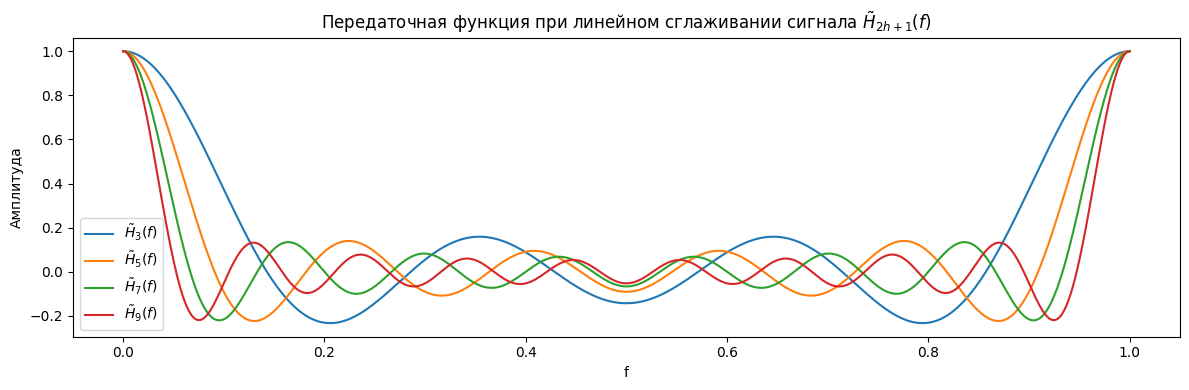

In [ ]:
def H1(f, h):
    sum_cos = np.sum([np.cos(2 * cm.pi * f * k) for k in range(1, h + 1)], axis=0)
    res = (1 + 2 * sum_cos) / (2 * h + 1)
    return res


f = np.linspace(0.0, 1.0, 1000)

plt.figure(figsize=(12, 4))

for i in [3, 5, 7, 9]:
    plt.plot(f, H1(f, i), label=f"$ \\tilde{{H}}_{{{i}}}(f) $")

plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h + 1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')

plt.tight_layout()
plt.legend()
plt.show()

Из графки видно, что фильтр является низкочастотным, так как при увеличении частоты амплитуда передаточной функции уменьшается. Так же можно заметить, что с увеличение количества точек для сглаживания уменьшается амплитуда колебаний графика, что говорит о большей избирательности фильтра к низким частотам.

### Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


Для сглаживания полиномом второй степени по $2h + 1$ точкам, фильтр задаётся следующей формулой:

$$y(t) = A + Bt + Ct^2$$

МНК:

$$
F_{2h + 1}(A, B, C) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2)^2 \to \min_{A, B, C}
$$

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2) = 0
\end{cases}
$$

$
\text{Т.к.} \sum_{k=-h}^{k=h} k = 0, \sum_{k=-h}^{k=h} k^3 = 0 \Rightarrow
$

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = (2h + 1) A + C \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k s_k = B \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4
\end{cases}
$$

Найдем A:

$$
y_0 = A = \frac{\sum s_k \sum k^4 - \sum k^2 \sum k^2 s_k}{(2h + 1) \sum k^4 - (\sum k^2)^2}
\Rightarrow
$$

$$
y_n = A = \frac{\sum_{k=-h}^{k=h} s_{n + k} \sum_{k=-h}^{k=h} k^4 - \sum_{k=-h}^{k=h} k^2 \sum_{k=-h}^{k=h} k^2 s_{n + k}}{(2h + 1) \sum_{k=-h}^{k=h} k^4 - (\sum_{k=-h}^{k=h} k^2)^2}
$$

$
\text{Пусть} \sum_{k=-h}^{k=h} k^2 = \frac{h(h+1)(2h+1)}{3}$ и $\sum_{k=-h}^{k=h} k^4= \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15}
\Rightarrow
$

$$
y_n = \frac{3}{(2h+1)((4h^2 + 4h -3))} ((3h^2 + 3h - 1) \sum_{k=-h}^{k=h} s_{n + k} - 5 \sum_{k=-h}^{k=h} k^2 s_{n + k})) = \frac{3e^{i \omega n}}{(2h+1)((4h^2 + 4h -3))} ((3h^2 + 3h - 1) \sum_{k=-h}^{k=h} e^{i \omega k} - 5 \sum_{k=-h}^{k=h} k^2 e^{i \omega k})) = \frac{3e^{i \omega n}}{(2h+1)((4h^2 + 4h -3))} ((3h^2 + 3h - 1) (1 + 2 \sum_{k=1}^{h} \cos(\omega k)) - 10 \sum_{k=1}^{h} k^2 \cos(\omega k))
$$

Получим:

$$
\tilde{H}(f) = H (2 \pi f) = \frac{3}{(2h+1)((4h^2 + 4h -3))} ((3h^2 + 3h - 1) (1 + 2 \sum_{k=1}^{h} \cos(2 \pi f k)) - 10 \sum_{k=1}^{h} k^2 \cos(2 \pi f k))
$$


In [ ]:
def H2(f, h):
    sum_cos_0 = np.sum(
        [np.cos(2 * cm.pi * f * k) for k in range(1, h + 1)], axis=0
    )
    sum_cos_2 = np.sum(
        [k**2 * np.cos(2 * cm.pi * f * k) for k in range(1, h + 1)], axis=0
    )
    res = (3 / ((2 * h + 1) * (4 * h**2 + 4 * h - 3))) * (
        (3 * h**2 + 3 * h - 1) * (1 + 2 * sum_cos_0) - 10 * sum_cos_2
    )
    return res

f = np.linspace(0.0, 1.0, 1000)

plt.figure(figsize=(12, 4))

for i in range(3, 7):
    plt.plot(f, H2(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h + 1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')

plt.tight_layout()
plt.legend()
plt.show()

Фильтр основанный на полиноме второй степени является низкочастотным фильтром. При увеличении количества точек для сглаживания, главная полоса пропускания становится уже, что говорит о том, что фильтр становится более избирательным к низким частотам.

По сравнению с предыдущим фильтром увеличилась полоса пропускания и частота колебаний на высоких частотах. При увеличении количества точек передаточная функция сильнее подавляет высокие частоты и становится более восприимчивой к ним и может вызывать искажения сигнала.

### Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал для сглаживания полиномом четвёртой степени по $2h + 1$ точкам задаётся следующей формулой:

$$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$$

МНК:
$$
F_{2h + 1}(A, B, C, D, E) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \to \min_{A, B, C, D, E}
$$

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial D} = -2 \sum_{k=-h}^{k=h} k^3(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
\frac{\partial F_{2h + 1}}{\partial E} = -2 \sum_{k=-h}^{k=h} k^4(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0
\end{cases}
\Rightarrow
$$

$
\text{Т.к.} \sum_{k=-h}^{k=h} k = 0, \sum_{k=-h}^{k=h} k^3 = 0 \Rightarrow
$

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = \sum_{k=-h}^{k=h} A + C \sum_{k=-h}^{k=h} k^2 + E \sum_{k=-h}^{k=h} k^4 \\
\sum_{k=-h}^{k=h} k s_k = B \sum_{k=-h}^{k=h} k^2 + D \sum_{k=-h}^{k=h} k^4 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4 + E \sum_{k=-h}^{k=h} k^6 \\
\sum_{k=-h}^{k=h} k^3 s_k = B \sum_{k=-h}^{k=h} k^4 + D \sum_{k=-h}^{k=h} k^6 \\
\sum_{k=-h}^{k=h} k^4 s_k = A \sum_{k=-h}^{k=h} k^4 + C \sum_{k=-h}^{k=h} k^6 + E \sum_{k=-h}^{k=h} k^8
\end{cases}
$$

$
\text{Пусть } S_m = \sum_{k=-h}^{k=h} k^m, R_m = \sum_{k=-h}^{k=h} k^m s_{k}\text{, найдем } A:
$

$$
\begin{cases}
R_0 = A S_0 + C S_2 + E S_4 \\
R_2 = A S_2 + C S_4 + E S_6 \\
R_4 = A S_4 + C S_6 + E S_8
\end{cases}
\Rightarrow
$$

$$
y_0 = A = \frac{R_0 (S_4 S_8 - S_6^2) - R_2 (S_2 S_8 - S_4 S_6) + R_4 (S_2 S_6 - S_4^2)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$

$
\text{Пусть } P_m = \sum_{k=-h}^{k=h} k^m s_{n + k}:
$

$$
y_n = A = \frac{P_0 (S_4 S_8 - S_6^2) - P_2 (S_2 S_8 - S_4 S_6) + P_4 (S_2 S_6 - S_4^2)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)} = e^{i \omega n} \frac{(S_4 S_8 - S_6^2) \cdot \sum_{k=-h}^{k=h} e^{i \omega k} - (S_2 S_8 - S_4 S_6) \cdot \sum_{k=-h}^{k=h} k^2 e^{i \omega k} + (S_2 S_6 - S_4^2) \cdot \sum_{k=-h}^{k=h} k^4 e^{i \omega k}}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)} = e^{i \omega n} \frac{(S_4 S_8 - S_6^2) + 2 \sum_{k=1}^{h} ((S_4 S_8 - S_6^2) - (S_2 S_8 - S_4 S_6) k^2 + (S_2 S_6 - S_4^2) k^4) \cos(\omega k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}$$

Получили:

$$
\tilde{H}(f) = H (2 \pi f) = \frac{(S_4 S_8 - S_6^2) + 2 \sum_{k=1}^{h} ((S_4 S_8 - S_6^2) - (S_2 S_8 - S_4 S_6) k^2 + (S_2 S_6 - S_4^2) k^4) \cos(2 \pi f k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)}
$$

In [ ]:

def S(m, h):
    return sum([k**m for k in range(-h, h + 1)])

def H3(f, h):
    S0 = S(0, h)
    S2 = S(2, h)
    S4 = S(4, h)
    S6 = S(6, h)
    S8 = S(8, h)
    D = S0 * (S4 * S8 - S6**2) - S2 * (S2 * S8 - S4 * S6) + S4 * (S2 * S6 - S4**2)
    a_cos = S4 * S8 - S6**2
    b_cos = -(S2 * S8 - S4 * S6)
    c_cos = S2 * S6 - S4**2
    sum_cos_0 = np.sum(
        [
            (a_cos + b_cos * k**2 + c_cos * k**4) * np.cos(2 * cm.pi * f * k)
            for k in range(1, h + 1)
        ],
        axis=0,
    )
    res = (S4 * S8 - S6**2 + 2 * sum_cos_0) / D
    return res

f = np.linspace(0.0, 1.0, 1000)

plt.figure(figsize=(12, 4))
for i in range(4, 8):
    plt.plot(f, H3(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 4 степени $ \\tilde{H}_{2h + 1}(f) $'
)
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.tight_layout()
plt.legend()
plt.show()


Фильтр основанный на полиноме четвёртой степени также является низкочастотным фильтром.

Полоса пропускания стала заметно шире по сравнению с предыдущими. Это говорит о том, что фильтр на основе полинома четвёртой степени менее избирателен к низким частотам. При увеличении количества точек для сглаживания, главная полоса пропускания становится уже, следовательно фильтр становится более избирательным к низким частотам.

### Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.



Выпишем формулы Спенсера для сглаживания по 15 и 21 точкам:



$
y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7}) = \frac{1}{320} ( -3e^{i \omega (n-7)} - 6e^{i \omega (n-6)} - 5e^{i \omega (n-5)} + 3e^{i \omega (n-4)} + 21e^{i \omega (n-3)} + 46e^{i \omega (n-2)} + 67e^{i \omega (n-1)} + 74e^{i \omega n} + 67e^{i \omega (n+1)} + 46e^{i \omega (n+2)} + 21e^{i \omega (n+3)} + 3e^{i \omega (n+4)} - 5e^{i \omega (n+5)} - 6e^{i \omega (n+6)} - 3e^{i \omega (n+7)} ) = e^{i \omega n} H_{15} (\omega)
$
$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{320} ( 74 + 2( 67 \cos(2 \pi f) + 46 \cos(4 \pi f) + 21 \cos(6 \pi f) + 3 \cos(8 \pi f) - 5 \cos(10 \pi f) - 6 \cos(12 \pi f) - 3 \cos(14 \pi f) ) )
$


Аналогично, для 21 точки получаем:

$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{350} ( 60 + 2( 57 \cos(2 \pi f) + 47 \cos(4 \pi f) + 33 \cos(6 \pi f) + 18 \cos(8 \pi f) + 6 \cos(10 \pi f) - 2 \cos(12 \pi f) - 5 \cos(14 \pi f) - 5 \cos(16 \pi f) - 3 \cos(18 \pi f) - 1 \cos(20 \pi f) ) )
$





In [ ]:
def H15(f):
    res = 74 + 2 * (
        67 * np.cos(2 * np.pi * f)
        + 46 * np.cos(2 * np.pi * f * 2)
        + 21 * np.cos(2 * np.pi * f * 3)
        + 3 * np.cos(2 * np.pi * f * 4)
        + (-5) * np.cos(2 * np.pi * f * 5)
        + (-6) * np.cos(2 * np.pi * f * 6)
        + (-3) * np.cos(2 * np.pi * f * 7)
    )
    return res / 320


def H21(f):
    res = 60 + 2 * (
        57 * np.cos(2 * np.pi * f)
        + 47 * np.cos(2 * np.pi * f * 2)
        + 33 * np.cos(2 * np.pi * f * 3)
        + 18 * np.cos(2 * np.pi * f * 4)
        + 6 * np.cos(2 * np.pi * f * 5)
        + (-2) * np.cos(2 * np.pi * f * 6)
        + (-5) * np.cos(2 * np.pi * f * 7)
        + (-5) * np.cos(2 * np.pi * f * 8)
        + (-3) * np.cos(2 * np.pi * f * 9)
        + (-1) * np.cos(2 * np.pi * f * 10)
    )
    return res / 350


f = np.linspace(0.0, 1.0, 1000)
plt.figure(figsize=(12, 4))
plt.plot(f, H15(f), label="$ \\tilde{H}_{15}(f) $")
plt.plot(f, H21(f), label="$ \\tilde{H}_{21}(f) $")
plt.title('Передаточная функция фильтра Спенсера $ \\tilde{H}_{15}(f) $ и $ \\tilde{H}_{21}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.tight_layout()
plt.legend()
plt.show()

Из графиков видно, что фильтры Спенсера также являются низкочастотными. В отличие от предыдущих фильтров, они не демонстрируют значительных колебаний амплитуды передаточной функции при увеличении частоты.

### Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.


Перевод значений передаточной функции в логарифмическую шкалу (Дб) осуществляется по формуле:

$Дб = 20 \lg \left(\left|\frac{y_n}{s_n}\right|\right) = 20 \lg (|H(w)|)$

In [ ]:
def Db(H):
    abs_H = np.abs(H)
    epsilon = 1e-8
    result = np.where(abs_H > epsilon, abs_H, -8)
    return 20 * np.log10(result, out=result, where=result > epsilon)


f = np.linspace(0.0, 1.0, 1000)
plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True, sharey=True)
plt.subplot(4, 1, 1)
for i in range(1, 5):
    plt.plot(
        f, Db(H1(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.subplot(4, 1, 2)
for i in range(3, 7):
    plt.plot(
        f, Db(H2(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 2 степени $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.subplot(4, 1, 3)
for i in range(4, 8):
    plt.plot(
        f, Db(H3(f, i)), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $"
    )
plt.title(
    'Передаточная функция при сглаживании сигнала полиномом 4 степени $ \\tilde{H}_{2h+1}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(f, Db(H15(f)), label="$ \\tilde{H}_{15}(f) $")
plt.plot(f, Db(H21(f)), label="$ \\tilde{H}_{21}(f) $")
plt.title(
    'Передаточная функция фильтра Спенсера $ \\tilde{H}_{15}(f) $ и $ \\tilde{H}_{21}(f) $ в дБ'
)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Амплитудная шкала удобна для анализа полосы пропускания, где хорошо видно незначительное ослабление низких частот. Однако в области подавления мелкие детали различимы плохо. Логарифмическая шкала (Дб), напротив, наглядно показывает глубину подавления высоких частот и форму среза, что делает её идеальной для оценки эффективности фильтра за пределами полосы пропускания.

### Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


Все проанализированные фильтры относятся к классу низкочастотных: их амплитуда передаточной функции снижается с ростом частоты. Это позволяет эффективно подавлять высокочастотные составляющие сигнала и пропускать низкочастотные, что и обуславливает их применение для сглаживания.

Сравнительный анализ выявил существенные различия:

- Линейное (простое) сглаживание обеспечивает плавный спад АЧХ, но имеет ограниченную эффективность подавления высоких частот (около –20 дБ).

- Полиномиальное сглаживание (2-й и 4-й степени) отличается большей избирательностью. Эти фильтры демонстрируют более сложную форму АЧХ и усиленное затухание на высоких частотах, что приводит к повышению качества сглаживания.

- Фильтр Спенсера показал наилучшие характеристики, достигнув максимального подавления высоких частот (свыше –40 дБ) при сохранении гладкой и ровной характеристики в полосе пропускания.

## Выводы

В ходе работы были исследованы нерекурсивные фильтры сглаживания, включая методы линейного и полиномиального сглаживания различных порядков, а также фильтр Спенсера. Анализ их передаточных функций позволил выявить ключевые особенности и сравнительную эффективность.

Линейное сглаживание, основанное на простом усреднении соседних отсчётов, проявляет свойства ФНЧ, однако обладает ограниченной эффективностью. Полиномиальное сглаживание демонстрирует, что с ростом степени аппроксимирующего полинома улучшается сохранение низкочастотного тренда и усиливается подавление высокочастотных шумовых составляющих. Фильтр Спенсера показал наилучшие характеристики, обеспечивая максимальное подавление высоких частот (до –40 дБ и ниже) и равномерную амплитудную характеристику в полосе пропускания, что делает его наиболее предпочтительным для задач подавления шума.

Логарифмическая шкала (дБ) нагляднее отражает глубину подавления шума и степень ослабления высоких частот.Линейная шкала удобнее для оценки общей формы АЧХ и визуализации полос пропускания и затухания.

Таким образом, исследование позволило систематизировать особенности поведения и передаточных характеристик нерекурсивных фильтров сглаживания, выявив clear зависимость между сложностью фильтра и его эффективностью.
